In [1]:
import java.io.File
import com.lignting.neural.*
import org.jetbrains.kotlinx.multik.api.mk
import org.jetbrains.kotlinx.multik.api.ndarray
import com.github.doyaaaaaken.kotlincsv.dsl.csvReader

In [2]:
val trainPath = "res/used_car_train_20200313.csv"
val testPath = "res/used_car_testA_20200313.csv"

In [3]:
fun getDataFrame(path:String): AnyFrame {
    val dataMap = mutableMapOf<String, MutableList<Double?>>()
    csvReader {
        delimiter = ' '
    }.readAllWithHeader(File(path)).forEach {
        it.forEach { entry ->
            if (dataMap[entry.key] == null)
                dataMap[entry.key] = mutableListOf()
            dataMap[entry.key]!!.add(entry.value.toDoubleOrNull())
        }
    }

    return dataMap.toDataFrame()
}

In [4]:
var trainDf = getDataFrame(trainPath)
var testDf = getDataFrame(testPath)

In [5]:
trainDf.describe().select { name and nulls }

name,nulls
SaleID,0
name,0
regDate,0
model,1
brand,0
bodyType,4506
fuelType,8680
gearbox,5981
power,0
kilometer,0


In [6]:
trainDf = trainDf.fillNulls() { model and bodyType and fuelType and gearbox and notRepairedDamage }.with { -1.0 }
testDf = testDf.fillNulls() { model and bodyType and fuelType and gearbox and notRepairedDamage }.with { -1.0 }

In [7]:
trainDf.describe().select { name and nulls }

name,nulls
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


In [8]:
trainDf.describe()

name,type,count,unique,nulls,top,freq,mean,std,min,median,max
SaleID,Double,150000,150000,0,0.000000,1,74999.500000,43301.414527,0.000000,74999.500000,149999.000000
name,Double,150000,99662,0,708.000000,282,68349.172873,61103.875095,0.000000,51638.000000,196812.000000
regDate,Double,150000,3894,0,20000008.000000,180,20034170.512180,53649.879255,19910001.000000,20030912.000000,20151212.000000
model,Double,150000,249,0,0.000000,11762,47.128700,49.536030,-1.000000,30.000000,247.000000
brand,Double,150000,40,0,0.000000,31480,8.052733,7.864956,0.000000,6.000000,39.000000
bodyType,Double,150000,9,0,0.000000,41420,1.708487,1.798313,-1.000000,1.000000,7.000000
fuelType,Double,150000,8,0,0.000000,91656,0.296227,0.621953,-1.000000,0.000000,6.000000
gearbox,Double,150000,3,0,0.000000,111623,0.176100,0.474170,-1.000000,0.000000,1.000000
power,Double,150000,566,0,0.000000,12829,119.316547,177.168419,0.000000,110.000000,19312.000000
kilometer,Double,150000,13,0,15.000000,96877,12.597160,3.919576,0.500000,15.000000,15.000000


In [9]:
class LabelEncoding() {
    val map = mutableMapOf<Double, Double>()
    var max = 0.0
    fun get(key: Double) =
        if (map.containsKey(key))
            map[key]
        else {
            max++
            map[key] = max
            max
        }
}

In [10]:
val bodyTypeLabelEncoding = LabelEncoding()
trainDf = trainDf.sortBy { bodyType }.update { bodyType }.with { bodyTypeLabelEncoding.get(it!!) }

val fuelTypeEncoding = LabelEncoding()
trainDf = trainDf.sortBy { fuelType }.update { fuelType }.with { fuelTypeEncoding.get(it!!) }

val regDateEncoding = LabelEncoding()
trainDf = trainDf.sortBy { regDate }.update { regDate }.with { regDateEncoding.get(it) }

val creatDateEncoding = LabelEncoding()
trainDf = trainDf.sortBy { creatDate }.update { creatDate }.with { creatDateEncoding.get(it) }

In [11]:
val modelMeanDf = trainDf.groupBy { model }.mean { price }
trainDf = trainDf.update { model }.with { value -> modelMeanDf.single { model == value }.price }

val brandMeanDf = trainDf.groupBy { brand }.mean { price }
trainDf = trainDf.update { brand }.with { value -> brandMeanDf.single { brand == value }.price }

val regionCodeMeanDf = trainDf.groupBy { regionCode }.mean { price }
trainDf = trainDf.update { regionCode }.with { value -> regionCodeMeanDf.single { regionCode == value }.price }

val nameMeanDf = trainDf.groupBy { name }.mean { price }
trainDf = trainDf.update { name }.with { value -> nameMeanDf.single { name == value }.price }

In [23]:
trainDf.sortBy{SaleID}

SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0.000000,2110.935897,2075.000000,2752.495730,3611.840266,3.000000,2.000000,0.000000,60.000000,12.500000,0.000000,8669.441176,0.000000,0.000000,93.000000,1850.000000,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1.000000,3517.894737,1906.000000,6818.198578,9273.311947,4.000000,2.000000,0.000000,0.000000,15.000000,-1.000000,6474.750000,0.000000,0.000000,67.000000,3600.000000,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2.000000,9361.000000,2076.000000,10908.763754,9858.582990,3.000000,2.000000,0.000000,163.000000,12.500000,0.000000,6142.764706,0.000000,0.000000,91.000000,6222.000000,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3.000000,4150.000000,893.000000,12733.515544,8470.804197,2.000000,2.000000,1.000000,193.000000,15.000000,0.000000,5160.368421,0.000000,0.000000,70.000000,2400.000000,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4.000000,5200.000000,3288.000000,1585.443831,3306.349411,3.000000,2.000000,0.000000,68.000000,5.000000,0.000000,11924.750000,0.000000,0.000000,71.000000,5200.000000,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5.000000,8000.000000,2879.000000,10589.536408,8470.804197,2.000000,3.000000,0.000000,109.000000,10.000000,0.000000,6060.882353,0.000000,0.000000,77.000000,8000.000000,46.323165,-3.229285,0.156615,-1.727217,-0.345690,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6.000000,4231.034483,1304.000000,8270.579745,8538.788074,2.000000,2.000000,1.000000,150.000000,15.000000,0.000000,15085.272727,0.000000,0.000000,75.000000,3500.000000,46.104335,4.926219,0.113311,1.644606,-1.270381,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7.000000,1000.000000,1335.000000,3302.292927,3052.660203,3.000000,2.000000,0.000000,101.000000,15.000000,0.000000,9038.090909,0.000000,0.000000,84.000000,1000.000000,42.255586,-3.167771,-0.676693,1.942673,0.524206,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8.000000,5663.750000,1898.000000,6738.326543,9273.311947,4.000000,3.000000,1.000000,179.000000,15.000000,0.000000,6783.333333,0.000000,0.000000,84.000000,2850.000000,46.084888,4.893717,0.475333,0.556575,-1.262490,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9.000000,650.000000,1102.000000,3381.030822,4196.064803,7.000000,2.000000,0.000000,88.000000,15.000000,0.000000,6729.341176,0.000000,0.000000,91.000000,650.000000,43.074626,1.666386,-2.201545,3.096861,0.843852,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [13]:
var count = 0

val proceedTrainData = trainDf.map { dataRow ->
    dataRow.columnNames().toMutableList().also { it.remove("price") }
        .map { dataRow[it].toString().toDouble() } to dataRow["price"].toString().toDouble()
}
//val processedTestData = testDf.map { dataRow ->
//    dataRow.columnNames().dropWhile { it == "price" }.map { dataRow[it] } to dataRow["price"]
//}

In [14]:
val trainX = mk.ndarray(proceedTrainData.map { it.first.drop(1) })
val trainY = mk.ndarray(proceedTrainData.map { listOf(it.second) })
//val testX = mk.ndarray(processedTestData.map { it.first })
//val testY = mk.ndarray(processedTestData.map { listOf(it.second) })

In [19]:
val model = Model(
    Dense(29, 20),
    Relu(),
    Dense(20, 12),
    Relu(),
    Dense(12, 8),
    Relu(),
    Dense(8, 4),
    Relu(),
    Dense(4, 1),
    loss = Mae(),
    optimizer = Adam()
)

In [21]:
val lossList = mutableListOf<Pair<Int, Double>>()

(1..100).forEach {
    val loss = model.fitWithBatchSize(trainX, trainY)
    lossList.add(it to loss)
}

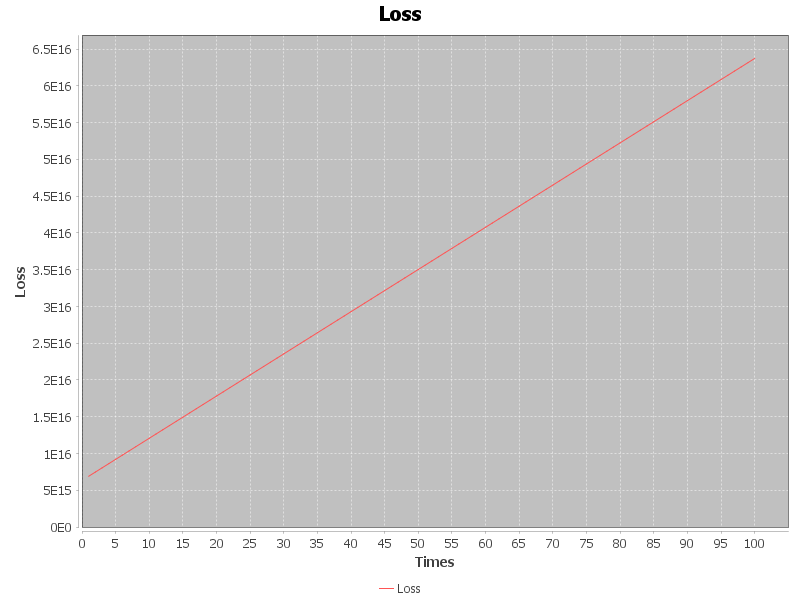

In [22]:
import org.jfree.chart.ChartFactory
import org.jfree.chart.ChartPanel
import org.jfree.chart.plot.PlotOrientation
import org.jfree.data.xy.XYSeries
import org.jfree.data.xy.XYSeriesCollection

val series = XYSeries("Loss")

lossList.forEach {
    series.add(it.first, it.second)
}
val dataSet = XYSeriesCollection()
dataSet.addSeries(series)
val chart = ChartFactory.createXYLineChart(
    "Loss", // 图表标题
    "Times", // x轴标题
    "Loss", // y轴标题
    dataSet, // 数据集
    PlotOrientation.VERTICAL, // 垂直方向
    true, // 是否包含图例
    true, // 是否生成工具提示
    false // 是否生成URL链接
)

chart.createBufferedImage(800, 600)